# importing the necessary libraries

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split 


# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras import layers, models

# os
import os

# Path
from pathlib import Path

# random
import random


# OrderedDict
from collections import OrderedDict

# # warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.ndimage import rotate






# importing the images

In [2]:
IMAGE_PATH = Path("C:/Users/MSI/Desktop/IDS4/sem2/data_mining/proj/Dataset for Adulterated Red Chilli Powder with Brick Powder") #path to the whole folder

IMAGE_PATH_LIST = list(IMAGE_PATH.glob("*/*/*/*.jpg")) #list with all the paths

print(f'Total Images = {len(IMAGE_PATH_LIST)}')

Total Images = 481


# Total number of images per class

In [4]:

CLASSES = ['Red chilli powder normal Sample',
           'Red chilli powder with 5_ brick powder',
           'Red chilli powder with 10_ brick powder',
           'Red chilli powder with 15_ brick powder',
           'Red chilli powder with 20_ brick powder',
           'Red chilli powder with 25_ brick powder',
           'Red chilli powder with 30_ brick powder',
           'Red chilli powder with 35_ brick powder',
           'Red chilli powder with 40_ brick powder',
           'Red chilli powder with 45_ brick powder',
           'Red chilli powder with 50_ brick powder', 
           'Brick powder normal sample'] #in sample 2 whe have 2 samples

print("==" * 30)
print(" " * 15, f"Total Classes = {len(CLASSES)}")
print("==" * 30)

for c in CLASSES:
    total_images_classes = list(Path(os.path.join(IMAGE_PATH, c)).glob("*/*/*.jpg"))  #joins the IMAGE_PATH with the classes and finds all jpg images
    print(f'* {c}: {len(total_images_classes)} images')

                Total Classes = 12
* Red chilli powder normal Sample: 40 images
* Red chilli powder with 5_ brick powder: 40 images
* Red chilli powder with 10_ brick powder: 40 images
* Red chilli powder with 15_ brick powder: 40 images
* Red chilli powder with 20_ brick powder: 40 images
* Red chilli powder with 25_ brick powder: 40 images
* Red chilli powder with 30_ brick powder: 40 images
* Red chilli powder with 35_ brick powder: 40 images
* Red chilli powder with 40_ brick powder: 40 images
* Red chilli powder with 45_ brick powder: 40 images
* Red chilli powder with 50_ brick powder: 40 images
* Brick powder normal sample: 41 images


# display 2 images for each class.

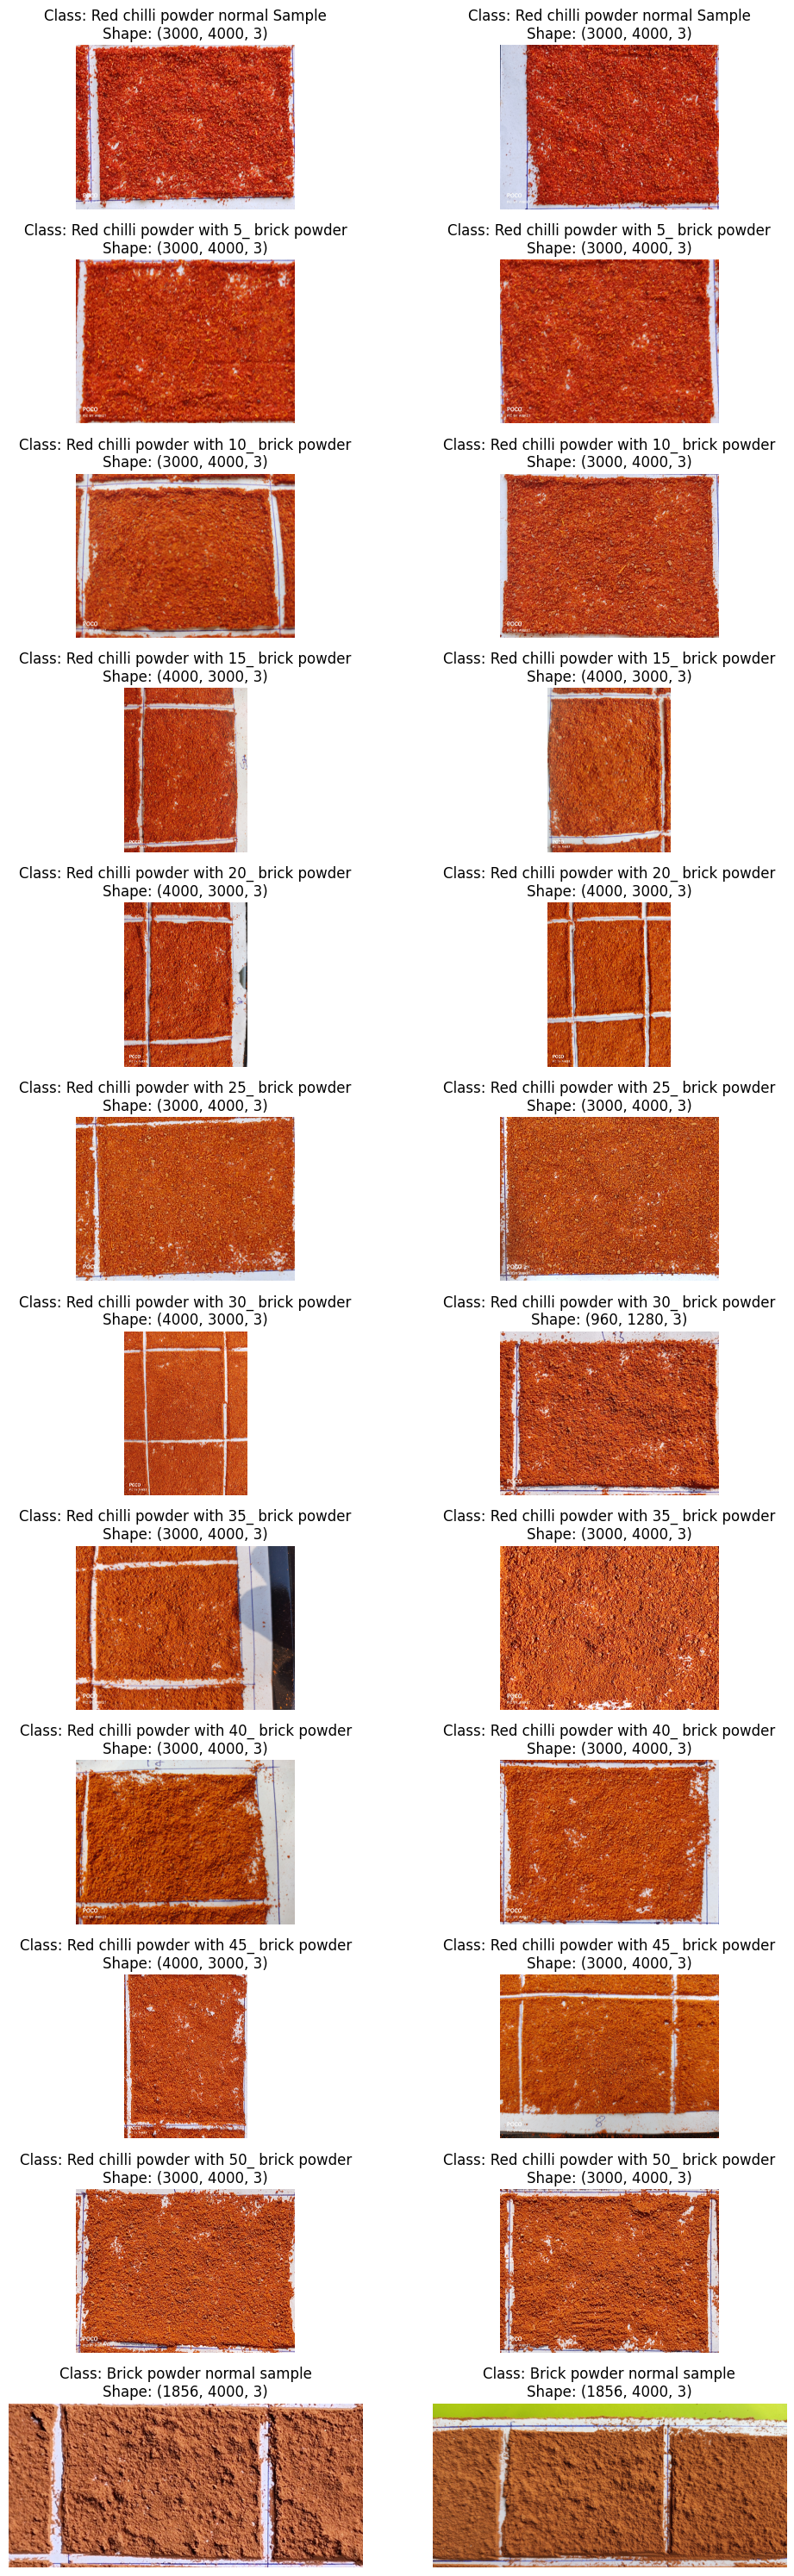

In [7]:


NUM_IMAGES = 2

fig, ax = plt.subplots(nrows = len(CLASSES), ncols = NUM_IMAGES, figsize = (10,30))
p = 0

for c in CLASSES:
    total_images_classes = list(Path(os.path.join(IMAGE_PATH, c)).glob("*/*/*.jpg"))
    images_selected = random.choices(total_images_classes, k = NUM_IMAGES)  #choose 2 images randomly 
    
    for i,img_select in enumerate(images_selected): #i columns number (0 or 1) and img_select the path to the selected images
        img_bgr = cv2.imread(str(img_select)) #reads the image using OpenCV in BGR format
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #converts the image from BGR to RGB format.
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f'Class: {c}\nShape: {img_rgb.shape}')
        ax[p,i].axis('off')
        
    p += 1 #nbre de lignes du subplot
fig.tight_layout()
fig.show()
#the shapes of the images are different

# Create the dataframe with images paths and labes

In [15]:
images_paths = [None] * len(IMAGE_PATH_LIST) #we create a list with the same legth as IMAGE_PATH_LIST (nbre of existing images),filled with none
labels = [None] * len(IMAGE_PATH_LIST)
for i,img_path in enumerate(IMAGE_PATH_LIST):
    images_paths[i] = img_path
    labels[i] = img_path.parent.parent.parent.stem #le label de l'image c'est le nom du folder parent parent patent ex: Brick powder normal sample\4xzoom\Sample-1\img.jpg
    
df_path_and_label = pd.DataFrame({'Image':images_paths, 'Label':labels}) #we create the dataframe
df_path_and_label.head()

Image  \
0  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   
1  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   
2  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   
3  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   
4  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   

                        Label  
0  Brick powder normal sample  
1  Brick powder normal sample  
2  Brick powder normal sample  
3  Brick powder normal sample  
4  Brick powder normal sample

# Change the labels

In [16]:
NEW_CLASSES_REPLACE = ['0', '5', '10', 
                       '15', '20', '25', 
                       '30', '35', '40', 
                       '45', '50', '100']

NEW_CLASSES_MAPPING = dict(zip(CLASSES, NEW_CLASSES_REPLACE)) #weccreate a dictionary so we can change the labels 
 b
NEW_CLASSES_MAPPING

{'Red chilli powder normal Sample': '0',
 'Red chilli powder with 5_ brick powder': '5',
 'Red chilli powder with 10_ brick powder': '10',
 'Red chilli powder with 15_ brick powder': '15',
 'Red chilli powder with 20_ brick powder': '20',
 'Red chilli powder with 25_ brick powder': '25',
 'Red chilli powder with 30_ brick powder': '30',
 'Red chilli powder with 35_ brick powder': '35',
 'Red chilli powder with 40_ brick powder': '40',
 'Red chilli powder with 45_ brick powder': '45',
 'Red chilli powder with 50_ brick powder': '50',
 'Brick powder normal sample': '100'}

In [17]:
df_path_and_label["Label"] = df_path_and_label["Label"].map(NEW_CLASSES_MAPPING) #change the labels with the new ones defined in the dictionary

df_path_and_label.head()

Image Label
0  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   100
1  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   100
2  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   100
3  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   100
4  C:\Users\MSI\Desktop\IDS4\sem2\data_mining\pro...   100

# Define the load_images function

In [20]:
def load_images(image_paths):
    images = []
    for image_path in image_paths:
        img = cv2.imread(str(image_path))  #read the image in BGR format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert it to RGB
        img = cv2.resize(img, (128, 128))  # Resize to match the input shape of the autoencoder which is (128,128)
        images.append(img)
    images = np.array(images, dtype='float32') / 255.0  # Normalize to [0, 1]
    return images   #return the list with reshaped, normalized images

# sperate normal and farudulent data , and split the data into train and test

In [24]:
normal_label = '0'  

# Separate normal and fraudulent samples
normal_df = df_path_and_label[df_path_and_label['Label'] == normal_label]
fraudulent_df = df_path_and_label[df_path_and_label['Label'] != normal_label]

# Split normal data into training and test sets
normal_train_df, normal_test_df = train_test_split(normal_df, test_size=0.4, random_state=42)

# Combine the remaining normal data with fraudulent data to create the test set
test_df = pd.concat([normal_test_df, fraudulent_df], ignore_index=True)

# Data augmentation

In [26]:
def rotate_image(image, angle):
    return rotate(image, angle, axes=(0, 1), reshape=False, mode='reflect')

def translate_image(image, shift, direction):
    if direction == 'horizontal':
        return np.roll(image, shift, axis=1)
    elif direction == 'vertical':
        return np.roll(image, shift, axis=0)

def flip_image(image, mode):
    if mode == 'horizontal':
        return np.flip(image, axis=1)
    elif mode == 'vertical':
        return np.flip(image, axis=0)

def extract_patches(image, patch_size=(64, 64), num_patches=5):  #A patch is a subset of an image, typically defined by its width and height in this case (64,64)
    patches = []
    h, w, _ = image.shape
    patch_h, patch_w = patch_size
    for _ in range(num_patches):
        top = random.randint(0, h - patch_h)
        left = random.randint(0, w - patch_w)
        patch = image[top:top + patch_h, left:left + patch_w, :]
        patches.append(patch)
    return patches


In [27]:
def augment_image(image):
    augmented_images = []

    # Rotate image by random angles
    angles = [90, 180, 270]
    for angle in angles:  #for each image we're gonna do a rotation each time with an angle of the defined 3
        rotated_img = rotate_image(image, angle)
        augmented_images.append(rotated_img)

    # Translate image horizontally and vertically
    shifts = [5, 10, 15]
    for shift in shifts:    #for each image we use all of the shift one by one  and with every shift we create an image with an horizontal translation and then another image with vertical translation
        translated_img_h = translate_image(image, shift, 'horizontal')
        translated_img_v = translate_image(image, shift, 'vertical')
        augmented_images.append(translated_img_h)
        augmented_images.append(translated_img_v)

    # Flip image horizontally and vertically
    flipped_img_h = flip_image(image, 'horizontal')
    flipped_img_v = flip_image(image, 'vertical')
    augmented_images.append(flipped_img_h)
    augmented_images.append(flipped_img_v)

    # Extract patches from the image
    patches = extract_patches(image)
    augmented_images.extend(patches)

    return augmented_images

def augment_and_ensure_shape(images, target_size):
    augmented_images = []
    while len(augmented_images) < target_size:
        for image in images:
            if len(augmented_images) >= target_size:
                break
            new_augmentations = augment_image(image)
            for img in new_augmentations:
                if img.shape == (128, 128, 3):   #we have to ensure that the shape is (128,128,3)
                    augmented_images.append(img)
    return np.array(augmented_images[:target_size])



# apply the augmentation for the train and test of normal data

In [28]:

X_train = load_images(normal_train_df['Image'].values)
X_train_augmented = augment_and_ensure_shape(X_train, target_size=300)  #the augmented images for X_train

normal_test_images = load_images(normal_test_df['Image'].values)
normal_test_augmented = augment_and_ensure_shape(normal_test_images, target_size=300)    #the augmented images for test of normal data

fraudulent_images = load_images(fraudulent_df['Image'].values)
X_test = np.concatenate((normal_test_augmented, fraudulent_images), axis=0)   #concatenating test of normal data and all the fraudulent data to create X_test


print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [29]:
array_of_zeros = ['0' for _ in range(300)]

In [30]:
y_test = np.concatenate((array_of_zeros, fraudulent_df['Label'].values), axis=0) #add a label 0 for all the augmented normal data for the testing 

# Create the autoencoder

In [32]:


def build_complex_autoencoder(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) #Applies 64 convolution filters of size 3x3 #The 'same' padding ensures the output has the same width and height as the input.#output (128, 128, 64)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) #Reduces the spatial dimensions (width and height) by half while keeping the depth the same. This downsampling helps in extracting dominant features.  #output (64, 64, 64)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)#output (64, 64, 128)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) #output (32, 32, 128)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)  #the input is the encoded 
    x = layers.UpSampling2D((2, 2))(x) #Increases the spatial dimensions by a factor of 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x) #The 'sigmoid' activation function is used to ensure the pixel values are in the range [0, 1]

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

input_shape = (128, 128, 3)  # Adapt according to your data
autoencoder = build_complex_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()





Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331,459 (5.08 MB)

 Trainable params: 1,331,459 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

autoencoder.fit(X_train_augmented, X_train_augmented,  #  both input and output are the same for the autoencoder
                epochs=150,
                batch_size=64,
                shuffle=True,
                validation_split=0.2,
                callbacks=[early_stopping]
               )


Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0900 - val_loss: 0.0609
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.0576 - val_loss: 0.0471
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.0453 - val_loss: 0.0395
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0396 - val_loss: 0.0356
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0359 - val_loss: 0.0335
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.0333 - val_loss: 0.0297
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0296 - val_loss: 0.0266
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0268 - val_loss: 0.0251
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.0255 - val_loss: 0.0235
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.0238 - val_loss: 0.0225
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.0230 - val_loss: 0.0215
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.0221 - val_loss: 0.0201
Epoch 13/15

# Reconstruction Error

In [34]:
import numpy as np

def calculate_reconstruction_error(original, reconstructed):
    return np.mean(np.square(original - reconstructed), axis=(1, 2, 3)) #we calculate the mean value for each image across its height, width, and channels

# Calculate reconstruction errors
reconstructed_images = autoencoder.predict(X_test)

reconstruction_errors = calculate_reconstruction_error(X_test, reconstructed_images)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step


In [ ]:
# reconstruction_errors

# plotting original and reconstructed images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


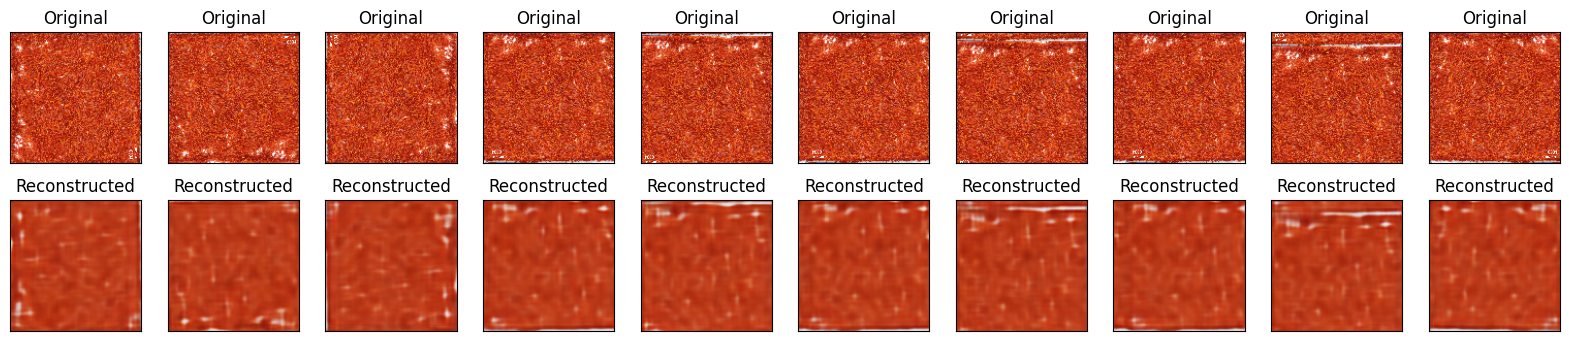

In [43]:
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plot_images(X_test, reconstructed_images, n=10)  


# using label classifiers

In [48]:

for i in range(len(y_test)):
    if y_test[i]!='0':
        y_test[i]='1'


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.52      0.35      0.42        66
           1       0.59      0.75      0.66        83

    accuracy                           0.57       149
   macro avg       0.56      0.55      0.54       149
weighted avg       0.56      0.57      0.55       149



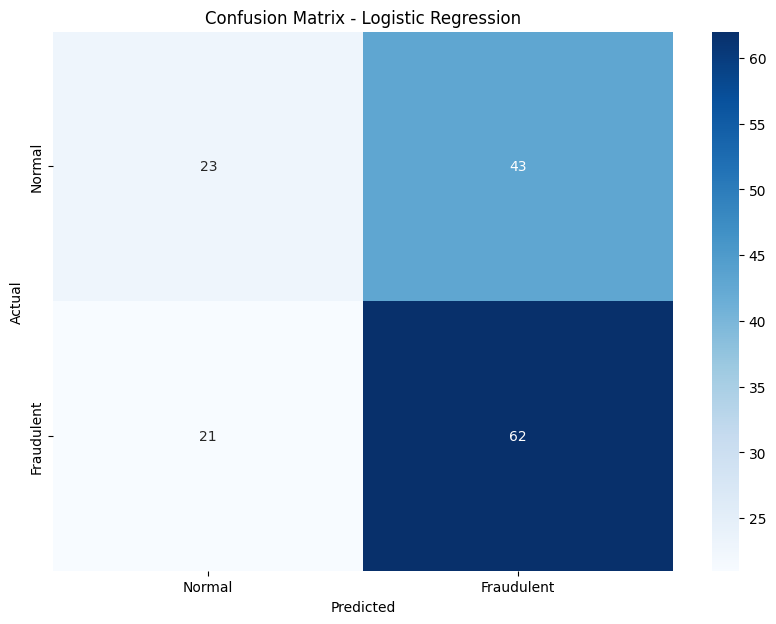

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        66
           1       0.87      0.81      0.84        83

    accuracy                           0.83       149
   macro avg       0.82      0.83      0.82       149
weighted avg       0.83      0.83      0.83       149



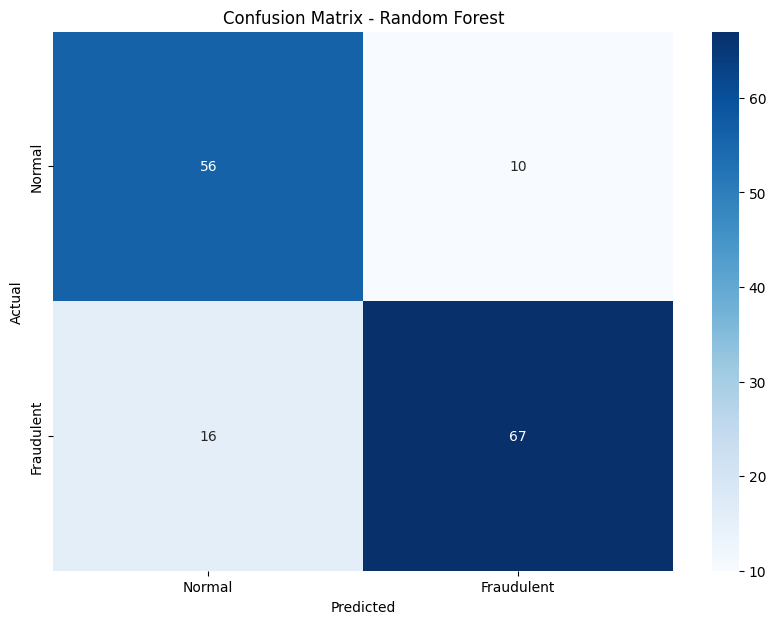

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        66
           1       0.75      0.65      0.70        83

    accuracy                           0.68       149
   macro avg       0.69      0.69      0.68       149
weighted avg       0.69      0.68      0.69       149



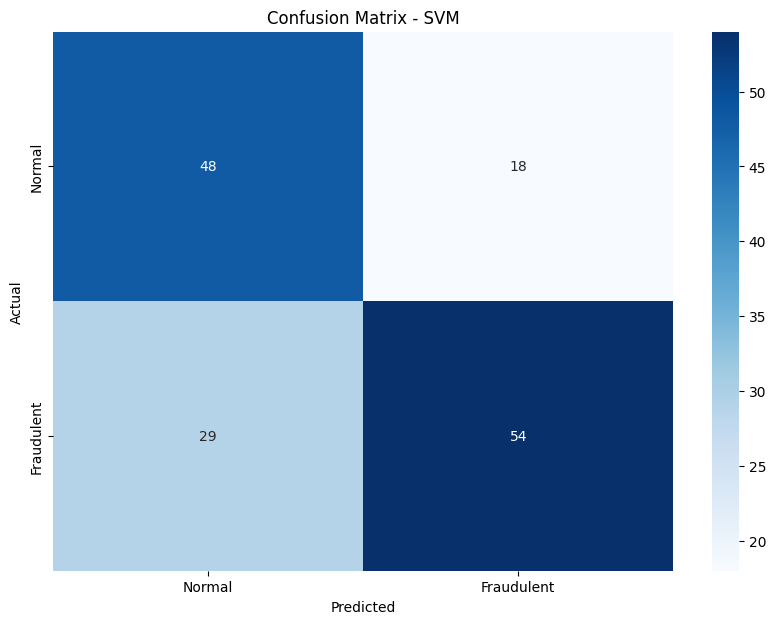

In [49]:
# Split reconstruction errors into training and validation sets
X_train_errors, X_val_errors, y_train_labels, y_val_labels = train_test_split(reconstruction_errors, y_test, test_size=0.2, random_state=42)

# Reshape errors to fit the classifier
X_train_errors = X_train_errors.reshape(-1, 1)  #nbre de lignes c'est le nbre d'elemnts
X_val_errors = X_val_errors.reshape(-1, 1)

# Standardize the errors
scaler = StandardScaler()
X_train_errors = scaler.fit_transform(X_train_errors)
X_val_errors = scaler.transform(X_val_errors)

# Try Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_errors, y_train_labels)
y_pred_lr = classifier_lr.predict(X_val_errors)

# Try Random Forest
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train_errors, y_train_labels)
y_pred_rf = classifier_rf.predict(X_val_errors)

# Try SVM
classifier_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
classifier_svm.fit(X_train_errors, y_train_labels)
y_pred_svm = classifier_svm.predict(X_val_errors)

#evaluate and plot the results
def evaluate_classifier(y_val_labels, y_pred, classifier_name):
    print(f'Classification Report for {classifier_name}')
    print(classification_report(y_val_labels, y_pred))
    
    cm = confusion_matrix(y_val_labels, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraudulent'], yticklabels=['Normal', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.show()

# Evaluate all classifiers
evaluate_classifier(y_val_labels, y_pred_lr, 'Logistic Regression')
evaluate_classifier(y_val_labels, y_pred_rf, 'Random Forest')
evaluate_classifier(y_val_labels, y_pred_svm, 'SVM')


from these models the most accurate one is Random Forest with accuracy of 83%, and with a logical number of predicted normals while being fraudulent whis should be the metric that we must minimise